Sentiment Analysis Using nltk

In [1]:
#imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

In [2]:
#read in api
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [3]:
#newsapi client
newsapi = NewsApiClient(api_key = api_key)

In [4]:
#bitcoin headlines
btc_headlines = newsapi.get_everything(
    q = 'bitcoin',
    language = 'en',
    sort_by = 'relevancy'
)

In [5]:
#ethereum headlines
eth_headlines = newsapi.get_everything(
    q = 'ethereum',
    language = 'en',
    sort_by = 'relevancy'
)

In [6]:
sentiments = []

for articles in btc_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'text': text,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)
btc.head()

,Compound,Positive,Negative,Neutral,text
0,0.3612,0.077,0.000,0.923,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...


In [7]:
sentiments = []

for articles in eth_headlines['articles']:
    try:
        text = articles['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        
        sentiments.append({
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'text': text,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)
eth.head()

,Compound,Positive,Negative,Neutral,text
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla..."
4,-0.1027,0.056,0.067,0.877,Trading platform Crypto.com lost about $34 mil...


In [8]:
#summary statistics btc
btc.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.041505,0.058200,0.037900,0.903900
std,0.366363,0.057018,0.043444,0.062064
min,-0.440400,0.000000,0.000000,0.765000
25%,-0.331550,0.000000,0.000000,0.875500
50%,0.038600,0.054000,0.000000,0.917000
75%,0.328950,0.084000,0.083250,0.934000
max,0.680800,0.185000,0.101000,1.000000


In [9]:
#summary statistics eth
eth.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.164365,0.053050,0.008700,0.938200
std,0.272452,0.065873,0.021502,0.066563
min,-0.153100,0.000000,0.000000,0.783000
25%,0.000000,0.000000,0.000000,0.894000
50%,0.000000,0.039500,0.000000,0.951000
75%,0.406800,0.090250,0.000000,1.000000
max,0.757900,0.217000,0.067000,1.000000


Tokenization 

In [10]:
#additional imports for tokenization
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
#lemmatization
wnl = WordNetLemmatizer()

stop = stopwords.words('english')
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [12]:
#tokenizer function
def tokenizer(text):
    words = word_tokenize(text)
    #convert all to lowercase
    words = list(filter(lambda w: w.lower(), words))
     # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens

In [13]:
#tokens column for btc
btc['tokens'] = btc.text.apply(tokenizer)
btc.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.3612,0.077,0.000,0.923,Musk.MARK RALSTON/AFP via Getty Images\r\nElon...,"[Musk.MARK, RALSTON/AFP, via, Getty, Images, E..."
1,0.0000,0.000,0.000,1.000,When Denis Rusinovich set up cryptocurrency mi...,"[Denis, Rusinovich, set, cryptocurrency, minin..."
2,0.3182,0.105,0.000,0.895,El Salvador introduced Bitcoin as a legal tend...,"[El, Salvador, introduced, Bitcoin, legal, ten..."
3,-0.4404,0.000,0.083,0.917,Were officially building an open Bitcoin minin...,"[officially, building, open, Bitcoin, mining, ..."
4,-0.3182,0.045,0.084,0.871,Israeli national Tal Prihar pled guilty to rou...,"[Israeli, national, Tal, Prihar, pled, guilty,..."


In [14]:
#tokens column for eth
eth['tokens'] = eth.text.apply(tokenizer)
eth.head()

,Compound,Positive,Negative,Neutral,text,tokens
0,0.0000,0.000,0.000,1.000,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, 4,836, ETH, 4..."
1,0.0000,0.000,0.000,1.000,Hackers who made off with roughly $15 million ...,"[Hackers, made, roughly, 15, million, ethereum..."
2,0.1779,0.052,0.000,0.948,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, age-old..."
3,0.0772,0.038,0.000,0.962,"Back in September\r\n, Robinhood announced pla...","[Back, September, Robinhood, announced, plan, ..."
4,-0.1027,0.056,0.067,0.877,Trading platform Crypto.com lost about $34 mil...,"[Trading, platform, Crypto.com, lost, 34, mill..."


NGrams and Frequency Analysis

In [15]:
#additional imports
from collections import Counter
from nltk import ngrams

In [16]:
#btc N-grams where N = 2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('mining', 'system'), 4),
 (('El', 'Salvador'), 3),
 (('Illustration', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'Verge'), 3),
 (('building', 'open'), 3),
 (('blog', 'post'), 3),
 (('Elon', 'Musk'), 2),
 (('alongside', 'US'), 2),
 (('US', 'dollar'), 2),
 (('International', 'Monetary'), 2),
 (('Monetary', 'Fund'), 2),
 (('officially', 'building'), 2),
 (('open', 'Bitcoin'), 2),
 (('Bitcoin', 'mining'), 2),
 (('Raedle/Getty', 'Images'), 2),
 (('Images', 'Block'), 2),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2)]

In [17]:
#eth N-grams where N = 2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('blog', 'post'), 3),
 (('new', 'blog'), 2),
 (('post', 'company'), 2),
 (('company', 'said'), 2),
 (('according', 'new'), 2),
 (('New', 'York'), 2),
 (('York', 'City'), 2),
 (('char', 'Crypto'), 2),
 (('Crypto', 'Street'), 2),
 (('Clearwater', 'Beach'), 2),
 (('Beach', 'Florida'), 2),
 (('li', 'NFT'), 2),
 (('char', 'BELIEVERS'), 2),
 (('BELIEVERS', 'OPEN'), 2),
 (('OPEN', 'public'), 2),
 (('public', 'blockchains'), 2),
 (('blockchains', 'provide'), 2),
 (('provide', 'second'), 2),
 (('second', 'chance'), 2),
 (('chance', 'building'), 2)]

In [18]:
#generates top 10 words for a given coin
def token_count(tokens, N):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Bitcoin', 9),
 ('company', 8),
 ('cryptocurrency', 7),
 ('mining', 7),
 ('open', 5),
 ('new', 5),
 ('bitcoin', 5),
 ('El', 4),
 ('building', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('Ethereum', 7),
 ('new', 6),
 ('cryptocurrency', 5),
 ('Bitcoin', 5),
 ('company', 4),
 ('digital', 4),
 ('2021', 4),
 ('blockchains', 4),
 ('blog', 3)]

Word Clouds

In [21]:
#additional imports
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [22]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

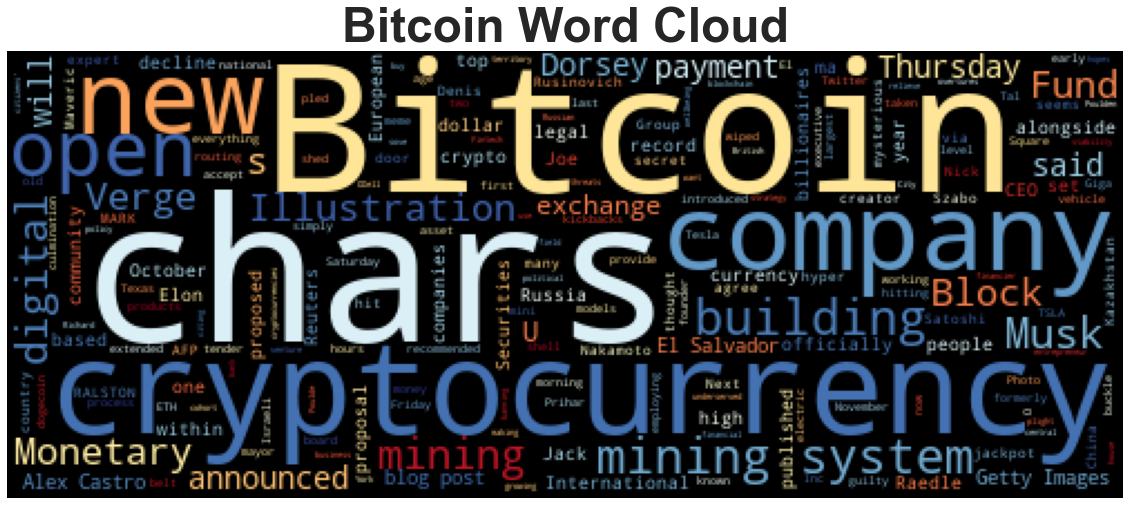

In [23]:
wordcloud(btc.text.str.cat(), title="Bitcoin Word Cloud")

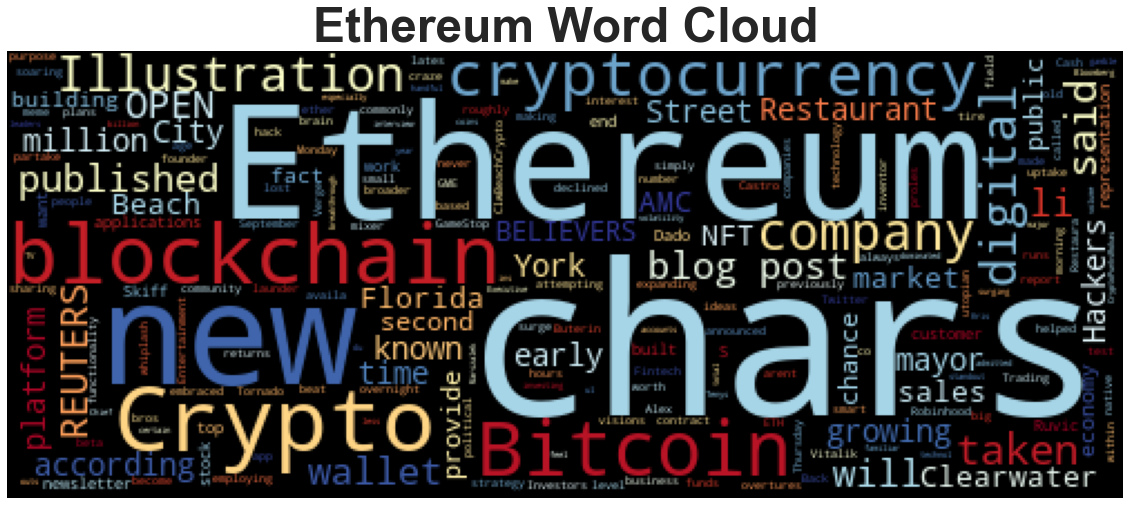

In [24]:
wordcloud(eth.text.str.cat(), title="Ethereum Word Cloud")

Named Entity Recognition

In [25]:
#additional imports
import spacy
from spacy import displacy

In [26]:
#load spaCy model
nlp = spacy.load('en_core_web_sm')

In [27]:
#concate all btc text
all_btc_text = btc.text.str.cat()
all_btc_text

'Musk.MARK RALSTON/AFP via Getty Images\r\nElon Musk seems to agree with many that hyper-secret cryptocurrency expert Nick Szabo could be Satoshi Nakamoto, the mysterious creator of the digital currency… [+1467 chars]When Denis Rusinovich set up cryptocurrency mining company Maveric Group in Kazakhstan in 2017, he thought he had hit the jackpot. Next door to China and Russia, the country had everything a Bitcoin … [+4140 chars]El Salvador introduced Bitcoin as a legal tender alongside the US dollar in 2021. | Illustration by Alex Castro / The Verge\r\n\n \n\n The International Monetary Fund’s executive board has recommended El … [+2691 chars]Were officially building an open Bitcoin mining system\r\nPhoto by Joe Raedle/Getty Images\r\nBlock, the payment company formerly known as Square, is working on building an open Bitcoin mining system, it… [+2078 chars]Israeli national Tal Prihar pled guilty to routing money from kickbacks through Bitcoin and shell companies \r\nIllustration by Alex

In [28]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [29]:
displacy.render(doc, style='ent', jupyter=True)

In [30]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Getty Images ORG
Elon Musk PERSON
Nick Szabo PERSON
Satoshi Nakamoto PERSON
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
chars]El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
chars]Russia GPE
Thursday DATE
Russian NORP
Bitcoin PERSON
El Salvador GPE
US GPE
The International Monetary Fund ORG
El Salvador GPE
Changpeng PERSON
Binance PERSON
Reuters ORG
Jan 26 D

In [31]:
# Concatenate ethereum text 
all_eth_text = eth.text.str.cat()
all_eth_text

"In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]Hackers who made off with roughly $15 million in ethereum from Crypto.com are attempting to launder the funds through a so-called ethereum mixer, known as Tornado Cash, according to a new report from… [+3891 chars]On some level, the new mayor is simply employing an age-old political strategy: making overtures to the business community. Fintech is a growing field in New York City, and blockchain-based companies… [+1562 chars]Back in September\r\n, Robinhood announced plans to test a cryptocurrency wallet within its app. At the time, the company said it would open the beta to a small number of people before expanding availa… [+1069 chars]Trading platform Crypto.com lost about $34 million worth of cryptocurrency in a hack on Monday, according to a new blog post by the compa

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(all_eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [34]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Ethereum ORG
Street Restaurant PERSON
Clearwater Beach GPE
Florida.@ClwBeachCrypto/Twitter ORG
Clearwater Beach GPE
Florida GPE
Crypto Street Restaura PERSON
Ethereum GPE
418% PERCENT
2021 DATE
AMC Entertainment ORG
AMC ORG
GME ORG
Ethereums ORG
more than 650% PERCENT
Vitalik Buterin PERSON
Ethereum ORG
Tenys ORG
a breakthrough year DATE
$14 billion MONEY
2021.</li><li CARDINAL
NFT ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
chars]New York City GPE
Eric Adams PERSON
first ORDINAL
Friday DATE
Bitcoin and Ethereum ORG
Coinbase Global Inc. ORG
U.S. GPE
TIME ORG
weekly DATE
Vita ORG
